<a href="https://colab.research.google.com/github/joungminhee/project/blob/master/Health_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = '/content/train.csv'
test_df = '/content/test.csv'
submission = '/content/sample_submission.csv'
train = pd.read_csv(train_df)
test = pd.read_csv(test_df)
sub = pd.read_csv(submission)
train.shape, test.shape, sub.shape

((381109, 12), (127037, 11), (127037, 2))

# data view

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [ ]:
train.describe(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [ ]:
train.describe(exclude='object')

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
# isnull()행 찾기
train[train.Response.isnull()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [ ]:
# na 행 값 삭제
train = train.dropna()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.8+ MB


In [ ]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [ ]:
train.shape, test.shape

((381109, 12), (127037, 11))

In [ ]:
train.Gender.value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [ ]:
train.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [ ]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [ ]:
train.Policy_Sales_Channel.value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [ ]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# EDA & 시각화

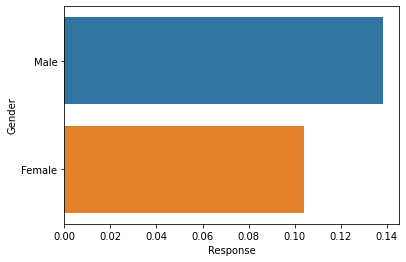

In [ ]:
sns.barplot(y='Gender', x='Response', data=train, ci=None)
plt.show()

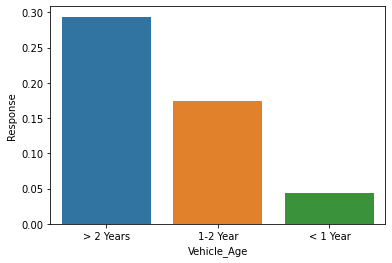

In [ ]:
sns.barplot(x='Vehicle_Age', y='Response', data=train, ci=None)
plt.show()

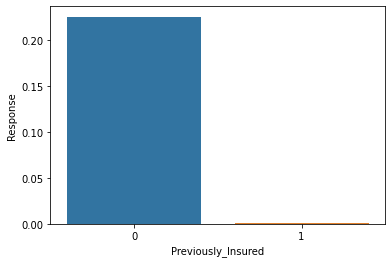

In [ ]:
sns.barplot(x='Previously_Insured', y='Response', data=train, ci=None)
plt.show()

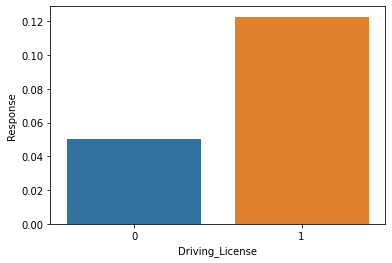

In [ ]:
sns.barplot(x='Driving_License', y='Response', data=train, ci=None)
plt.show()

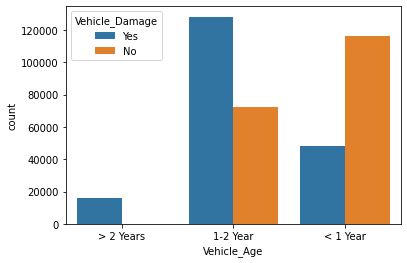

In [ ]:
sns.countplot(data=train,x='Vehicle_Age',hue='Vehicle_Damage')
plt.show()

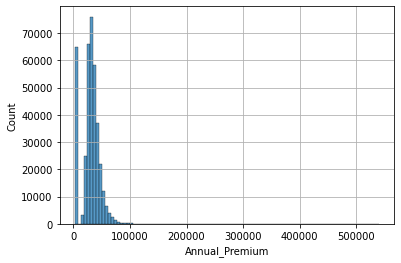

In [ ]:
sns.histplot(x=train['Annual_Premium'], bins=100)
plt.grid()
plt.show()

In [ ]:
train = train.drop(columns='id')
test = test.drop(columns='id')

In [ ]:
train.shape, test.shape

((381109, 11), (127037, 10))

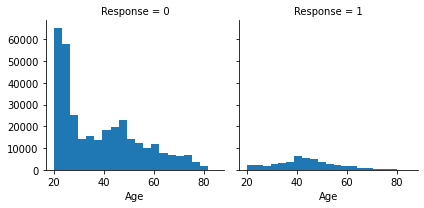

In [ ]:
# 응답 여부에 따른 연령 분포
S = sns.FacetGrid(train, col='Response')
S.map(plt.hist,'Age', bins=20)
plt.show()

In [ ]:
train.shape, test.shape

((381109, 11), (127037, 10))

# 전처리

In [ ]:
# 카테고리별 라벨인코딩
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Vehicle_Age','Vehicle_Damage']
for col in cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [ ]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [ ]:
#구간화 인코딩
def age_category(age):
    age = int(np.floor(age//10))
    return age

In [ ]:
train['Age'] = train.Age.apply(age_category)
test['Age'] = test.Age.apply(age_category)

In [ ]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,4,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,7,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,4,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,2,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,2,1,41.0,1,1,0,27496.0,152.0,39,0


In [ ]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,2,1,11.0,1,1,0,35786.0,152.0,53
1,1,4,1,28.0,0,0,1,33762.0,7.0,111
2,1,4,1,28.0,0,0,1,40050.0,124.0,199
3,1,2,1,27.0,1,1,1,37356.0,152.0,187
4,1,2,1,28.0,1,1,0,59097.0,152.0,297


In [ ]:
y = train.pop('Response')
train.shape, test.shape

((381109, 10), (127037, 10))

In [ ]:
X = train.values.copy()

(381109, 10)

In [ ]:
X.shape, y.shape

((381109, 10), (381109,))

#표준화

In [ ]:
from sklearn.preprocessing import StandardScaler
num = ['Annual_Premium','Policy_Sales_Channel','Vintage']
scaler = StandardScaler()
train[num] = scaler.fit_transform(train[num])
test[num] = scaler.transform(test[num])

In [ ]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,4,1,28.0,0,2,1,0.574539,-1.587234,0.748795
1,1,7,1,3.0,0,0,0,0.172636,-1.587234,0.342443
2,1,4,1,28.0,0,2,1,0.449053,-1.587234,-1.521998
3,1,2,1,11.0,1,1,0,-0.113018,0.737321,0.581474
4,0,2,1,41.0,1,1,0,-0.178259,0.737321,-1.378580


In [ ]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,2,1,11.0,1,1,0,0.303350,0.737321,-1.211258
1,1,4,1,28.0,0,0,1,0.185766,-1.937762,-0.518068
2,1,4,1,28.0,0,0,1,0.551068,0.220753,0.533668
3,1,2,1,27.0,1,1,1,0.394560,0.737321,0.390249
4,1,2,1,28.0,1,1,0,1.657607,0.737321,1.704919


# 모델링

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, r2_score, accuracy_score

In [ ]:
X_tr, X_te, y_tr, y_te =train_test_split(X,y,
                                         test_size=0.3,
                                         stratify=y,
                                         random_state=42)

# 의사결정나무

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_tr,y_tr)

te_pred = model.predict(X_te)

In [ ]:
accuracy_xgb = accuracy_score(y_te, te_pred)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

Accuracy: 82.46%


# XGBOOST

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_tr,y_tr)

te_pred = model_xgb.predict(X_te) 
accuracy_xgb = accuracy_score(y_te, te_pred)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

Accuracy: 87.74%
